## Analysis of PyCity Schools
Looking at the the plots created after each analysis, it is obvious that:

* Spending more money per-student did not improve grades at all.  Schools with smaller budgets (585 per student) dramatically out-performed schools with higher spending (645-675 per student) on overall passing percentage (90% passing vs 53%). 

* Small class size means better grades and that is why smaller and medium sized schools dramatically out-performed large sized schools on overall passing percentage (90% passing vs 58%).

* Charter schools grade-average way better than District or public schools, this is very clear when we look at top five performing schools"all Charters" vs bottom five ones"all District". 

* Charter schools kids out perform their District counterpart by 37% points when it comes to the overall percentage of passing both math and reading (90% vs 53%).

In [1]:
# import depandancies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load csv files
school_data_to_load = "Resources/schools_complete.csv"
student_data_to_load = "Resources/students_complete.csv"

# read csv files and create pandas data frames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# combine the two file into one data frame using merge function on a left join..  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()
# school_data_complete.dtypes

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [3]:
# crate a new data frame for use in later analysis without format
school_df = school_data_complete.loc[:, ["school_name", "type", "size", "budget", "math_score", "reading_score"]]

# Calculate the Totals (Schools and Students)
total_school_count = len(school_df["school_name"].unique())
total_studentid_count = school_df["size"].count()

# Calculate the Total Budget
total_budget = school_data['budget'].sum()

In [4]:
# calculate the average scores
average_math_score = school_df["math_score"].mean()
average_reading_score = school_df["reading_score"].mean()

In [5]:
# Calculate the Percentage Pass Rates

# Math % pass
math_score_file = school_df.loc[school_df["math_score"] >=70]
math_score_count = math_score_file.count()["size"]
percent_passing_math = (math_score_count / float(total_studentid_count))*100

# Reading % pass
reading_score_file = school_df.loc[school_df["reading_score"] >=70]
reading_score_count = reading_score_file.count()["size"]
percent_passing_reading = (reading_score_count / float(total_studentid_count))*100

# Overall % pass
school_name_group = school_df.groupby(['school_name'])
filtered_school_name_group = school_name_group.mean()
overall_pass = school_df.loc[(school_df["math_score"] >= 70) & (
        school_df["reading_score"] >= 70), :]
percent_overall_pass = (overall_pass["math_score"].count() / float(total_studentid_count))*100

In [9]:
# Data Cleanup and rename columns
district_summary_df = pd.DataFrame({
                                "Total Schools": [total_school_count],
                                "Total Students": [total_studentid_count],
                                "Total Budget": [total_budget],
                                "Average Math Score": [average_math_score],
                                "Average Reading Score": [average_reading_score],
                                "% Passing Math": [percent_passing_math],
                                "% Passing Reading": [percent_passing_reading],
                                "% Over all Passing": [percent_overall_pass]
})

In [10]:

# Formatting
district_summary_df["Total Students"] = district_summary_df["Total Students"].map("{:,}".format)
district_summary_df["Total Budget"] = district_summary_df["Total Budget"].astype(float).map("${:,.2f}".format)
district_summary_df["Average Math Score"] = district_summary_df["Average Math Score"].astype(float).map("{:,.2f}".format)
district_summary_df["Average Reading Score"] = district_summary_df["Average Reading Score"].astype(float).map("{:,.2f}".format)
district_summary_df["% Passing Math"] = district_summary_df["% Passing Math"].astype(float).map("{:,.2f} %".format)
district_summary_df["% Passing Reading"] = district_summary_df["% Passing Reading"].astype(float).map("{:,.2f} %".format)
district_summary_df["% Over all Passing"] = district_summary_df["% Over all Passing"].astype(float).map("{:,.2f} %".format)

# display district summary data frame
district_summary_df

,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Over all Passing
0,15,"39,170","$24,649,428.00",78.99,81.88,74.98 %,85.81 %,65.17 %


## School Summary

In [11]:
# Determine the School Type
school_types = school_data.set_index(["school_name"])["type"]

# Calculate the total student count
per_school_counts = school_data_complete["school_name"].value_counts()

# Calculate the total school budget and per capita spending
per_school_budget = school_data_complete.groupby(["school_name"]).mean()["budget"]
per_school_capita = per_school_budget / per_school_counts

# Calculate the average test scores
average_school_math = school_data_complete.groupby(["school_name"]).mean()["math_score"]
average_school_reading = school_data_complete.groupby(["school_name"]).mean()["reading_score"]

In [12]:
# create separate filtered DataFrames for math, reading and overll pass
#  filtered data frame for the students who passed math
school_math_score = school_data_complete[(school_data_complete["math_score"] >=70)]
school_math_filter = school_math_score.groupby(["school_name"]).count()["student_name"]

#  filtered data frame for the students who passed reading
school_reading_score = school_data_complete[(school_data_complete["reading_score"] >=70)]
school_reading_filter = school_reading_score.groupby(["school_name"]).count()["student_name"]

#  filtered data frame for students overall pass for both math and reading
school_overall_pass = school_data_complete[(school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)]          
overall_pass_filter = school_overall_pass.groupby(['school_name']).count()["student_name"]

In [13]:
#  Calculate the Percentage Pass Rates
percent_passing_math = (school_math_filter / per_school_counts)*100
percent_passing_reading = (school_reading_filter / per_school_counts)*100
percent_overall_passing = (overall_pass_filter / per_school_counts)*100

In [14]:
# crate new df with renamed columns
school_summary_df = pd.DataFrame({
                            "School Type": school_types,
                            "Total Students": per_school_counts,
                            "Total School Budget": per_school_budget,
                            "Per Student Budget": per_school_capita,
                            "Average Math Score": average_school_math,
                            "Average Reading Score": average_school_reading,
                            "% Passing Math": percent_passing_math,
                            "% Passing Reading": percent_passing_reading,
                            "% Overall Passing": percent_overall_passing
})

# reset the index and save a copy for later use without format
school_summary_df.index.name = "School Name"
school_summary_df = school_summary_df.reset_index()
copy_school_summary_df = school_summary_df.copy()

# format
school_summary_df["Total School Budget"] = school_summary_df["Total School Budget"].map("${:,.2f}".format)
school_summary_df["Per Student Budget"] = school_summary_df["Per Student Budget"].map("${:,.2f}".format)
school_summary_df["Average Math Score"] = school_summary_df["Average Math Score"].map("{:,.2f}".format)
school_summary_df["Average Reading Score"] = school_summary_df["Average Reading Score"].map("{:,.2f}".format)
school_summary_df["% Passing Math"] = school_summary_df["% Passing Math"].map("{:,.2f} %".format)
school_summary_df["% Passing Reading"] = school_summary_df["% Passing Reading"].map("{:,.2f} %".format)
school_summary_df["% Overall Passing"] = school_summary_df["% Overall Passing"].map("{:,.2f} %".format)

# display school summary
school_summary_df.head()

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,Bailey High School,District,4976,"$3,124,928.00",$628.00,77.05,81.03,66.68 %,81.93 %,54.64 %
1,Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.06,83.98,94.13 %,97.04 %,91.33 %
2,Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.71,81.16,65.99 %,80.74 %,53.20 %
3,Ford High School,District,2739,"$1,763,916.00",$644.00,77.10,80.75,68.31 %,79.30 %,54.29 %
4,Griffin High School,Charter,1468,"$917,500.00",$625.00,83.35,83.82,93.39 %,97.14 %,90.60 %


## Top performing schools by % overall pass

In [16]:
# Sort and show top five schools
top_performing_schools = school_summary_df.sort_values("% Overall Passing", ascending=False)
top_performing_schools.head(5)

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
1,Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,83.06,83.98,94.13 %,97.04 %,91.33 %
12,Thomas High School,Charter,1635,"$1,043,130.00",$638.00,83.42,83.85,93.27 %,97.31 %,90.95 %
4,Griffin High School,Charter,1468,"$917,500.00",$625.00,83.35,83.82,93.39 %,97.14 %,90.60 %
13,Wilson High School,Charter,2283,"$1,319,574.00",$578.00,83.27,83.99,93.87 %,96.54 %,90.58 %
9,Pena High School,Charter,962,"$585,858.00",$609.00,83.84,84.04,94.59 %,95.95 %,90.54 %


# Bottom Performing Schools By % Overall Pass

In [17]:
# Sort and show bottom five schools
bottom_performing_schools = school_summary_df.sort_values("% Overall Passing")
bottom_performing_schools.head()

,School Name,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
10,Rodriguez High School,District,3999,"$2,547,363.00",$637.00,76.84,80.74,66.37 %,80.22 %,52.99 %
2,Figueroa High School,District,2949,"$1,884,411.00",$639.00,76.71,81.16,65.99 %,80.74 %,53.20 %
7,Huang High School,District,2917,"$1,910,635.00",$655.00,76.63,81.18,65.68 %,81.32 %,53.51 %
5,Hernandez High School,District,4635,"$3,022,020.00",$652.00,77.29,80.93,66.75 %,80.86 %,53.53 %
8,Johnson High School,District,4761,"$3,094,650.00",$650.00,77.07,80.97,66.06 %,81.22 %,53.54 %


# Math scores by grades

In [18]:
# Create data series of 9th graders and group by school name
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
ninth_graders_series = ninth_graders.groupby(["school_name"]).mean()["math_score"]

# Create data series of 10th graders and group by school name
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
tenth_graders_series = tenth_graders.groupby(["school_name"]).mean()["math_score"]

# Create data series of 11th graders and group by school name
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
eleventh_graders_series = eleventh_graders.groupby(["school_name"]).mean()["math_score"]

# Create data series of 12th graders and group by school name
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]
twelfth_graders_series = twelfth_graders.groupby(["school_name"]).mean()["math_score"]



In [19]:
# Combine series into single DataFrame
average_math_score = pd.DataFrame({"9th": ninth_graders_series, "10th": tenth_graders_series, "11th": eleventh_graders_series, "12th": twelfth_graders_series})

# Minor data munging
average_math_score = average_math_score[["9th", "10th", "11th", "12th"]]
# average_math_score.index.name = ["School Name"]

# format
average_math_score["9th"] = average_math_score["9th"].astype(float).map("{:,.2f}".format)
average_math_score["10th"] = average_math_score["10th"].astype(float).map("{:,.2f}".format)
average_math_score["11th"] = average_math_score["11th"].astype(float).map("{:,.2f}".format)
average_math_score["12th"] = average_math_score["12th"].astype(float).map("{:,.2f}".format)

# reset index and display data frame
average_math_score = average_math_score.reset_index()
average_math_score.head()

,school_name,9th,10th,11th,12th
0,Bailey High School,77.08,77.00,77.52,76.49
1,Cabrera High School,83.09,83.15,82.77,83.28
2,Figueroa High School,76.40,76.54,76.88,77.15
3,Ford High School,77.36,77.67,76.92,76.18
4,Griffin High School,82.04,84.23,83.84,83.36


# Reading score by grades

In [20]:
# Create data series of 9th graders and group by school name
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
ninth_graders_series = ninth_graders.groupby(["school_name"]).mean()["reading_score"]

# Create data series of 10th graders and group by school name
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
tenth_graders_series = tenth_graders.groupby(["school_name"]).mean()["reading_score"]

# Create data series of 11th graders and group by school name
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
eleventh_graders_series = eleventh_graders.groupby(["school_name"]).mean()["reading_score"]

# Create data series of 12th graders and group by school name
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]
twelfth_graders_series = twelfth_graders.groupby(["school_name"]).mean()["reading_score"]



In [21]:
# Combine series into single DataFrame
average_reading_score = pd.DataFrame({"9th": ninth_graders_series, "10th": tenth_graders_series, "11th": eleventh_graders_series, "12th": twelfth_graders_series})

# Minor data munging
average_reading_score = average_reading_score[["9th", "10th", "11th", "12th"]]
# average_math_score.index.name(["School Name"])


# format
average_reading_score["9th"] = average_reading_score["9th"].astype(float).map("{:,.2f}".format)
average_reading_score["10th"] = average_reading_score["10th"].astype(float).map("{:,.2f}".format)
average_reading_score["11th"] = average_reading_score["11th"].astype(float).map("{:,.2f}".format)
average_reading_score["12th"] = average_reading_score["12th"].astype(float).map("{:,.2f}".format)

# reset index and display data frame
average_reading_score = average_reading_score.reset_index()
average_reading_score.head()

,school_name,9th,10th,11th,12th
0,Bailey High School,81.30,80.91,80.95,80.91
1,Cabrera High School,83.68,84.25,83.79,84.29
2,Figueroa High School,81.20,81.41,80.64,81.38
3,Ford High School,80.63,81.26,80.40,80.66
4,Griffin High School,83.37,83.71,84.29,84.01


# Scores by school spending

In [22]:
# Establish the bins 
spending_bins = [0, 584, 629, 644, 675]
spending_labels = ["<$584", "$585-629", "$630-644", "$645-675"]

In [23]:
# create data frame with needed columns using saved df.
spending_per_student = copy_school_summary_df.loc[:, ['Average Math Score', 'Average Reading Score','Per Student Budget', '% Passing Math', '% Passing Reading', '% Overall Passing']]

# Categorize spending based on the bins.
spending_per_student["Spending Ranges (Per Student)"] = pd.cut(spending_per_student["Per Student Budget"], spending_bins, labels=spending_labels)

# groupby and take the mean of catogorized data frame
spending_per_student = spending_per_student.groupby("Spending Ranges (Per Student)").mean()

In [24]:
# clean up and save a copy for later use to create bar chart.
spending_per_student = spending_per_student[['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]
copy_spending_per_student = spending_per_student.copy()

In [25]:
# format 
spending_per_student["Average Math Score"] = spending_per_student["Average Math Score"].map("{:,.2f}".format)
spending_per_student["Average Reading Score"] = spending_per_student["Average Reading Score"].map("{:,.2f}".format)
spending_per_student["% Passing Math"] = spending_per_student["% Passing Math"].map("{:,.2f} %".format)
spending_per_student["% Passing Reading"] = spending_per_student["% Passing Reading"].map("{:,.2f} %".format)
spending_per_student["% Overall Passing"] = spending_per_student["% Overall Passing"].map("{:,.2f} %".format)

# reset index and display data frame
spending_per_student = spending_per_student.reset_index()
spending_per_student.head()

,Spending Ranges (Per Student),Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,<$584,83.46,83.93,93.46 %,96.61 %,90.37 %
1,$585-629,81.90,83.16,87.13 %,92.72 %,81.42 %
2,$630-644,78.52,81.62,73.48 %,84.39 %,62.86 %
3,$645-675,77.00,81.03,66.16 %,81.13 %,53.53 %


In [38]:
# create a bar chart showing spending range and scores 
plot = copy_spending_per_student.plot.bar()
fig = plot.get_figure()
fig.savefig("/Images/spending.png")
fig


FileNotFoundError: [Errno 2] No such file or directory: '/Images/spanding.png'

# Scores by school size

In [229]:
# Establish the bins 
size_bins = [0, 1000, 2000, 5000]
size_labels = ["Small <1000", "Medium 1000-2000", "Large 2000-5000"]

In [230]:
# create data frame with needed columns.
school_size_df = copy_school_summary_df.loc[:, ['Total Students', 'Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]

# Categorize spending based on the bins.
school_size_df["School Size"] = pd.cut(school_size_df["Total Students"], bins, labels=group_labels)

# groupby and take the mean of catogorized data frame
school_size_df = school_size_df.groupby("School Size").mean()

In [231]:
# clean up and save a copy for later use to create bar chart.
school_size_df = school_size_df[['Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]
copy_school_size_df = school_size_df.copy()

In [232]:
# format
school_size_df["Average Math Score"] = school_size_df["Average Math Score"].map("{:,.2f}".format)
school_size_df["Average Reading Score"] = school_size_df["Average Reading Score"].map("{:,.2f}".format)
school_size_df["% Passing Math"] = school_size_df["% Passing Math"].map("{:,.2f} %".format)
school_size_df["% Passing Reading"] = school_size_df["% Passing Reading"].map("{:,.2f} %".format)
school_size_df["% Overall Passing"] = school_size_df["% Overall Passing"].map("{:,.2f} %".format)

# reset index and display data frame
school_size_df = school_size_df.reset_index()
school_size_df

,School Size,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,Small <1000,83.82,83.93,93.55 %,96.10 %,89.88 %
1,Medium 1000-2000,83.37,83.86,93.60 %,96.79 %,90.62 %
2,Large 2000-5000,77.75,81.34,69.96 %,82.77 %,58.29 %


<AxesSubplot:xlabel='School Size'>

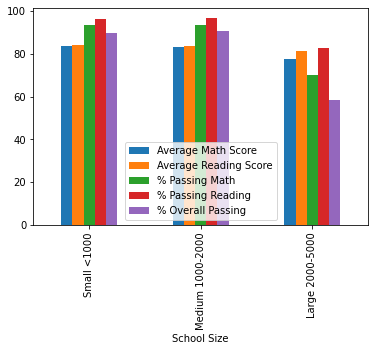

In [233]:
# create a bar chart showing school size and scores 
copy_school_size_df.plot(kind='bar')

## Score by School Type

In [234]:
# create new data frame
school_type_df = copy_school_summary_df.loc[:, ['School Type','Average Math Score', 'Average Reading Score', '% Passing Math', '% Passing Reading', '% Overall Passing']]

# group by School Type and take the mean of all scores
school_type_df = school_type_df.groupby("School Type").mean()

# save a copy for use to create bar chart
copy_school_type_df = school_type_df.copy()

# format 
school_type_df["Average Math Score"] = school_type_df["Average Math Score"].map("{:,.2f}".format)
school_type_df["Average Reading Score"] = school_type_df["Average Reading Score"].map("{:,.2f}".format)
school_type_df["% Passing Math"] = school_type_df["% Passing Math"].map("{:,.2f} %".format)
school_type_df["% Passing Reading"] = school_type_df["% Passing Reading"].map("{:,.2f} %".format)
school_type_df["% Overall Passing"] = school_type_df["% Overall Passing"].map("{:,.2f} %".format)

# reset index and display
school_type_df = school_type_df.reset_index()
school_type_df


,School Type,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,Charter,83.47,83.90,93.62 %,96.59 %,90.43 %
1,District,76.96,80.97,66.55 %,80.80 %,53.67 %


<AxesSubplot:xlabel='School Type'>

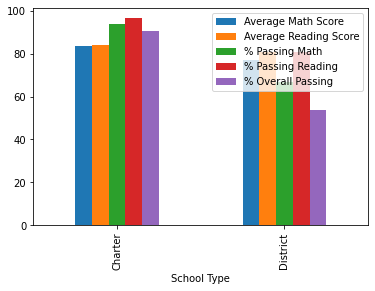

In [235]:
# create a bar chart showing school type and scores
copy_school_type_df.plot(kind='bar')